# 情報工学工房 第四回レポート課題

# 課題
1. サンプルコードを実行してMNISTデータを学習してください。simple_convnet.pyの実装も見てみましょう。
2. 今後の実践編のためにPytorchのチュートリアルに取り組む。

# 回答
1. サンプルコードの実行によるMNISTデータの学習結果は次の通り。

In [1]:
%matplotlib inline
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 5 #20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


train loss:2.2993728651675087
=== epoch:1, train acc:0.189, test acc:0.195 ===
train loss:2.2980270081270784
train loss:2.2924242505955474
train loss:2.285878680911797
train loss:2.276530244330425
train loss:2.2617832301671688
train loss:2.2616763482905915
train loss:2.2414087282649264
train loss:2.2238584367135483
train loss:2.2057977134652385
train loss:2.1749290602452525
train loss:2.1479882267995425
train loss:2.112582504142621
train loss:2.0595584590091245
train loss:1.993987098332587
train loss:1.9549391169774075
train loss:1.8905181735710113
train loss:1.852967624615004
train loss:1.751772392819323
train loss:1.705529779891443
train loss:1.5603861460900645
train loss:1.5121244866768475
train loss:1.4071786177807388
train loss:1.3304400805978542
train loss:1.261308498820823
train loss:1.2787081038455925
train loss:1.1558242863147323
train loss:1.0238466552828525
train loss:0.954086383437807
train loss:0.9314672499036633
train loss:0.9244575685858749
train loss:0.781062819188418
t

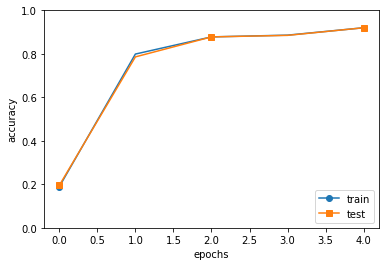

In [2]:
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

以上の結果より、MNISTデータの学習ができたといえる。

## 感想
- スムーズに学習が進んだと感じた
- Pytorchの操作に慣れておきたい

## 参考
- http://pr.cei.uec.ac.jp/kobo2020/index.php?Pytorch%E3%81%AB%E3%82%88%E3%82%8B%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92%20%E7%94%BB%E5%83%8F%E8%AA%8D%E8%AD%98%E3%83%BB%E7%94%9F%E6%88%90
- https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html